# Projeto Telecomm
---

 O Objetivo deste projeto é, através do tratamento e análise de uma base dados de vendas de uma empresa de telecomunicações, extrair informações sobre Taxa de Churn (Churn Rate) e perfil dos clientes. Dessa forma, através da visualização desses dados, seria possível tomar decisões de forma facilitada e assertiva. A Taxa de Churn é um importante indicador para empresas pois apontam a quantidade de clientes que deixaram de fazer negócios em um período de tempo. Avaliando estes números, avaliando o perfil dos clientes e outras informações é possível, em muitos casos, reverter cancelamentos.

  Com esse tratamento da base e análise exploratória, podemos construir visualizações utilizando Power Bi e também prepará-la para utilização em modelos de predição.

#### Metodologia

As principais etapas do projeto consistem em:
 
  1. Extração dos dados;
  2. Limpeza dos dados: Identificando e tratando dados nulos, duplicados e vazio;
  3. Análise exploratória
  4. Análise de Churn
  5. Preparação para modelo de predição 

## 1. Extração
---

 Nesta etapa, o principal objetivo é avaliar algumas características dos dados e salvá-los da melhor forma, para que sejam analisados a seguir.

In [1]:
#Importando bibliotecas
import json
import pandas as pd

In [3]:
#Salvando o arquivo bruto em uma variável
path_json = (r'C:\Users\Nathaly\OneDrive\Documentos\Análise de dados\Data Science\Pandas - Limpeza e Tratamento de Dados\dataset-telecon.json')

with open(path_json, encoding='utf-8') as file:
  json_bruto = json.load(file)

In [4]:
#Exibindo a variável
json_bruto

[{'id_cliente': '0002-ORFBO',
  'Churn': 'nao',
  'cliente': {'genero': 'feminino',
   'idoso': 0,
   'parceiro': 'sim',
   'dependentes': 'sim',
   'tempo_servico': 9},
  'telefone': {'servico_telefone': 'sim', 'varias_linhas': 'nao'},
  'internet': {'servico_internet': 'DSL',
   'seguranca_online': 'nao',
   'backup_online': 'sim',
   'protecao_dispositivo': 'nao',
   'suporte_tecnico': 'sim',
   'tv_streaming': 'sim',
   'filmes_streaming': 'nao'},
  'conta': {'contrato': None,
   'faturamente_eletronico': None,
   'metodo_pagamento': None,
   'cobranca': {'mensal': None, 'Total': None}}},
 {'id_cliente': '0003-MKNFE',
  'Churn': 'nao',
  'cliente': {'genero': 'masculino',
   'idoso': 0,
   'parceiro': 'nao',
   'dependentes': 'nao',
   'tempo_servico': 9},
  'telefone': {'servico_telefone': 'sim', 'varias_linhas': 'sim'},
  'internet': {'servico_internet': 'DSL',
   'seguranca_online': 'nao',
   'backup_online': 'nao',
   'protecao_dispositivo': 'nao',
   'suporte_tecnico': 'nao',


In [5]:
#Transformando em DataFrame Pandas
df_json = pd.read_json(path_json)

In [6]:
#Exibindo os 5 primeiros registros
df_json.head()

,id_cliente,Churn,cliente,telefone,internet,conta
0,0002-ORFBO,nao,"{'genero': 'feminino', 'idoso': 0, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': None, 'faturamente_eletronico': N..."
1,0003-MKNFE,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': 'mes a mes', 'faturamente_eletron..."
2,0004-TLHLJ,sim,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
3,0011-IGKFF,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
4,0013-EXCHZ,sim,"{'genero': 'feminino', 'idoso': 1, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."


In [7]:
#Exibindo o primeiro registro
df_json['conta'][0]

{'contrato': None,
 'faturamente_eletronico': None,
 'metodo_pagamento': None,
 'cobranca': {'mensal': None, 'Total': None}}

In [8]:
#Normalizando arquivo json e exibindo primeiros registros
dados_normalizados = pd.json_normalize(json_bruto)
dados_normalizados.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


In [9]:
#Exibindo primeiro registro
dados_normalizados['Churn'][0]

'nao'

Até aqui já temos o nosso primeiro dataset bruto estruturado para utilizarmos nas próximas análises (_dados_normalizados_). Agora, iremos verificar os tipos de dados que temos em cada coluna para que eles as futuras manipulações que faremos.

In [10]:
#Exibindo o tipo de dado contido em cada coluna
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

 Percebemos que algumas colunas numéricas estão apresentadas como 'object', como a coluna 'conta.cobranca.Total'. Assim, precisamos transfomá-la em 'float', depois de tratar os campos faltantes. 

 Trataremos essa mudança na próxima etapa de limpeza dos Dados.

### Dicionários de dados



Segue abaixo o dicionário dos dados do arquivo:

**Cliente**

*   genero: gênero (masculino e feminino)
*   idoso: informação sobre um(a) cliente ter ou não idade igual ou maior que 65 anos
*   parceiro: se o(a) cliente possui ou não um(a) parceiro ou parceira
*   dependentes: se o(a) cliente possui ou não dependentes
*   tempo_servico: meses de contrato do(a) cliente


**Serviço de telefonia**

*   servico_telefone: assinatura de serviço telefônico
*   varias_linhas: assinatura de mais de uma linha de telefone


**Serviço de internet**

*   servico_internet: assinatura de um provedor internet
*   seguranca_online: assinatura adicional de segurança online
*   backup_online: assinatura adicional de backup online
*   protecao_dispositivo: assinatura adicional de proteção no dispositivo
*   suporte_tecnico: assinatura adicional de suporte técnico, menos tempo de espera
*   tv_streaming: assinatura de TV a cabo
*   filmes_streaming: assinatura de streaming de filmes


**Conta**

*   contrato: tipo de contrato
*   faturamente_eletronico: se o(a) cliente prefere receber a fatura online
*   metodo_pagamento: forma de pagamento
*   cobranca.mensal: total de todos os serviços do(a) cliente por mês
*   cobranca.Total: total gasto pelo(a) cliente

## 2. Limpeza dos dados
---

Nessa etapa, o objetivo é analisar e avaliar a presença de dados vazios, nulos e duplicados, e verificar a melhor forma de exclui-los ou substituí-los. Dessa forma, essas inconsistências não impactarão de forma negativa as análises que se seguirão.

### Identificando e tratando dados vazios

In [227]:
for col in dados_normalizados.columns:
    print(f"Coluna: {col}")
    print(dados_normalizados[col].unique())
    print("=" * 60)

Coluna: id_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Coluna: Churn
['nao' 'sim' '']
Coluna: cliente.genero
['feminino' 'masculino']
Coluna: cliente.idoso
[0 1]
Coluna: cliente.parceiro
['sim' 'nao']
Coluna: cliente.dependentes
['sim' 'nao']
Coluna: cliente.tempo_servico
[9.00e+00 4.00e+00 1.30e+01 3.00e+00 7.10e+01 6.30e+01 7.00e+00      nan
 5.40e+01 7.20e+01 5.00e+00 5.60e+01 3.40e+01 1.00e+00 4.50e+01 5.00e+01
 2.30e+01 5.50e+01 2.60e+01 6.90e+01 1.10e+01 3.70e+01 4.90e+01 6.60e+01
 6.70e+01 2.00e+01 4.30e+01 5.90e+01 1.20e+01 2.70e+01 2.00e+00 2.50e+01
 2.90e+01 1.40e+01 3.50e+01 6.40e+01 3.90e+01 4.00e+01 6.00e+00 3.00e+01
 7.00e+01 5.70e+01 5.80e+01 1.60e+01 3.20e+01 3.30e+01 1.00e+01 2.10e+01
 6.10e+01 1.50e+01 4.40e+01 2.20e+01 2.40e+01 1.90e+01 4.70e+01 6.20e+01
 4.60e+01 5.20e+01 8.00e+00 6.00e+01 4.80e+01 2.80e+01 6.50e+01 4.10e+01
 5.30e+01 6.80e+01 5.10e+01 3.10e+01 3.60e+01 1.70e+01 1.80e+01 3.80e+01
 4.20e+01 1.08e+03 1.

In [20]:
#Identificando quais dados estão vazios na coluna 'conta.cobranca.Total'
dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' ']

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
975,1371-DWPAZ,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cartao de credito (automatico),56.05,
1775,2520-SGTTA,nao,feminino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.00,
1955,2775-SEFEE,nao,masculino,0,nao,sim,0.0,sim,sim,DSL,...,sim,nao,sim,nao,nao,dois anos,sim,transferencia bancaria (automatica),61.90,
2075,2923-ARZLG,nao,masculino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cheque pelo correio,19.70,
2232,3115-CZMZD,nao,masculino,0,nao,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.25,
2308,3213-VVOLG,nao,masculino,0,sim,sim,0.0,sim,sim,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,25.35,
2930,4075-WKNIU,nao,feminino,0,sim,sim,0.0,sim,sim,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cheque pelo correio,73.35,
3134,4367-NUYAO,nao,masculino,0,sim,sim,0.0,sim,sim,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,25.75,
3203,4472-LVYGI,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,nao,sim,sim,sim,nao,dois anos,sim,transferencia bancaria (automatica),52.55,
4169,5709-LVOEQ,nao,feminino,0,sim,sim,0.0,sim,nao,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,cheque pelo correio,80.85,


Percebemos que apenas a coluna 'conta.cobranca.Total' possui realmente valores faltantes. Porém, observando as outras informações que temos podemos inferir esses dados através de uma multiplicação. 
Vamos ver com mais detalhes.

In [24]:
#Exibindo as colunas 'cliente.tempo_servico', 'conta.contrato','conta.cobranca.mensal', 'conta.cobranca.Total' referentes aos campos vazios da coluna 'conta.cobranca.Total'
dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '][
    ['cliente.tempo_servico', 'conta.contrato', 'conta.cobranca.mensal', 'conta.cobranca.Total']
]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2075,0.0,dois anos,19.70,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,


Percebemos que as outras colunas relacionadas a essa também possuem possibilidades de serem inferidas, como a 'cliente.tempo_servico' que podemos utilizar as informações da coluna 'conta.contrato'. Vamos detalhar melhor.

In [26]:
#Salvando os índices dos campos vazios em uma variável
idx = dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '].index
idx

Index([975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599], dtype='int64')

In [27]:
#Multiplicando a coluna 'conta.cobranca.mensal' por 24 (meses) para obtermos o valor total
dados_normalizados.loc[idx, "conta.cobranca.Total"] = dados_normalizados.loc[idx, "conta.cobranca.mensal"] * 24

In [28]:
#Substituindo o valor '0.0' por 24 (meses) na coluna 'cliente.tempo_servico'
dados_normalizados.loc[idx, "cliente.tempo_servico"] = 24

In [29]:
#Exibindo as colunas já com as modificações
dados_normalizados.loc[idx][
['cliente.tempo_servico', 'conta.contrato', 'conta.cobranca.mensal', 'conta.cobranca.Total']
]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,24.0,dois anos,56.05,1345.2
1775,24.0,dois anos,20.00,480.0
1955,24.0,dois anos,61.90,1485.6
2075,24.0,dois anos,19.70,472.8
2232,24.0,dois anos,20.25,486.0
2308,24.0,dois anos,25.35,608.4
2930,24.0,dois anos,73.35,1760.4
3134,24.0,dois anos,25.75,618.0
3203,24.0,dois anos,52.55,1261.2
4169,24.0,dois anos,80.85,1940.4


Agora podemos modificar o tipo da coluna.

In [30]:
#Modificando o tipo da coluna para 'float'
dados_normalizados['conta.cobranca.Total'] = dados_normalizados['conta.cobranca.Total'].astype(float)

In [31]:
#Exibindo as informações das colunas
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

Temos já as modificações nas colunas. Agora vamos verificar outros possíveis campos vazios.

In [44]:
#Exibindo os valores unicos de cada coluna para verificar outros campos vazios
for col in dados_normalizados.columns:
    print(f"Coluna: {col}")
    print(dados_normalizados[col].unique())
    print("-" * 30)

Coluna: id_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna: Churn
['nao' 'sim' '']
------------------------------
Coluna: cliente.genero
['feminino' 'masculino']
------------------------------
Coluna: cliente.idoso
[0 1]
------------------------------
Coluna: cliente.parceiro
['sim' 'nao']
------------------------------
Coluna: cliente.dependentes
['sim' 'nao']
------------------------------
Coluna: cliente.tempo_servico
[9.00e+00 4.00e+00 1.30e+01 3.00e+00 7.10e+01 6.30e+01 7.00e+00      nan
 5.40e+01 7.20e+01 5.00e+00 5.60e+01 3.40e+01 1.00e+00 4.50e+01 5.00e+01
 2.30e+01 5.50e+01 2.60e+01 6.90e+01 1.10e+01 3.70e+01 4.90e+01 6.60e+01
 6.70e+01 2.00e+01 4.30e+01 5.90e+01 1.20e+01 2.70e+01 2.00e+00 2.50e+01
 2.90e+01 1.40e+01 3.50e+01 6.40e+01 3.90e+01 4.00e+01 6.00e+00 3.00e+01
 7.00e+01 5.70e+01 5.80e+01 1.60e+01 3.20e+01 3.30e+01 1.00e+01 2.10e+01
 6.10e+01 1.50e+01 4.40e+01 2.20e+01 2.40e+01 1.90e+01

Assim, percebemos que a coluna 'Churn' possui alguns campos vazios. Vamos observar com mais detalhes.

In [45]:
#Verificando o número de vazios na coluna Churn
dados_normalizados.query("Churn == ''")

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
30,0047-ZHDTW,,feminino,0,nao,nao,11.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,transferencia bancaria (automatica),79.00,929.30
75,0120-YZLQA,,masculino,0,nao,nao,71.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cartao de credito (automatico),19.90,1355.10
96,0154-QYHJU,,masculino,0,nao,nao,29.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,um ano,sim,cheque eletronico,58.75,1696.20
98,0162-RZGMZ,,feminino,1,nao,nao,5.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,mes a mes,nao,cartao de credito (automatico),59.90,287.85
175,0274-VVQOQ,,masculino,1,sim,nao,65.0,sim,sim,fibra otica,...,sim,sim,nao,sim,sim,um ano,sim,transferencia bancaria (automatica),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211,9920-GNDMB,,masculino,0,nao,nao,9.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,76.25,684.85
7239,9955-RVWSC,,feminino,0,sim,sim,67.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,transferencia bancaria (automatica),19.25,1372.90
7247,9966-VYRTZ,,feminino,0,sim,sim,31.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,sim,cheque pelo correio,19.55,658.95
7267,6532-YOHZY,,masculino,0,sim,sim,45.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,transferencia bancaria (automatica),109.75,4900.65


Como o _Churn_ é um fator que tem grande impacto na nossa análise e por se tratar de informações que não podemos inferir, iremos trabalhar sem eles.

In [46]:
#Salvando os dados sem vazios em uma nova variável
dados_sem_vazio = dados_normalizados[dados_normalizados['Churn'] != '']

In [47]:
#Criando uma cópia para não sobreescrever o arquivo anterior
dados_sem_vazio = dados_normalizados[dados_normalizados['Churn'] != ''].copy()

In [48]:
#Verificando infoamrações da nova variável
dados_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7118 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7118 non-null   object 
 1   Churn                          7118 non-null   object 
 2   cliente.genero                 7118 non-null   object 
 3   cliente.idoso                  7118 non-null   int64  
 4   cliente.parceiro               7118 non-null   object 
 5   cliente.dependentes            7118 non-null   object 
 6   cliente.tempo_servico          7110 non-null   float64
 7   telefone.servico_telefone      7118 non-null   object 
 8   telefone.varias_linhas         7118 non-null   object 
 9   internet.servico_internet      7118 non-null   object 
 10  internet.seguranca_online      7118 non-null   object 
 11  internet.backup_online         7118 non-null   object 
 12  internet.protecao_dispositivo  7118 non-null   object

In [49]:
#Verificando os índices
dados_sem_vazio.reset_index()

,index,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
1,1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
2,2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,7338,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,7339,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,7340,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,7341,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [50]:
#Substituindo os novos índices
dados_sem_vazio.reset_index(drop=True, inplace=True)

In [51]:
#Exibindo modificações
dados_sem_vazio

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


### Identificando e tratando linhas duplicadas

In [53]:
#Exibindo linhas duplicadas
dados_sem_vazio.duplicated().sum()

np.int64(75)

In [62]:
filtro_duplicadas = dados_sem_vazio.duplicated()
dados_sem_vazio[filtro_duplicadas]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
7043,0675-NCDYU,nao,feminino,0,sim,sim,72.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,cartao de credito (automatico),116.40,8543.25
7044,6754-LZUKA,nao,masculino,0,sim,nao,61.0,sim,sim,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,transferencia bancaria (automatica),80.90,4932.50
7045,2192-CKRLV,nao,feminino,0,sim,nao,72.0,nao,sem servico de telefone,DSL,...,sim,sim,nao,nao,sim,dois anos,sim,cheque eletronico,49.20,3580.95
7046,9170-ARBTB,nao,feminino,0,sim,sim,52.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),19.60,1012.40
7047,0447-BEMNG,sim,feminino,0,sim,nao,48.0,nao,sem servico de telefone,DSL,...,nao,sim,nao,nao,sim,mes a mes,sim,transferencia bancaria (automatica),45.30,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [58]:
filtro_duplicadas = dados_sem_vazio[dados_sem_vazio.duplicated()]
filtro_duplicadas

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
7043,0675-NCDYU,nao,feminino,0,sim,sim,72.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,cartao de credito (automatico),116.40,8543.25
7044,6754-LZUKA,nao,masculino,0,sim,nao,61.0,sim,sim,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,transferencia bancaria (automatica),80.90,4932.50
7045,2192-CKRLV,nao,feminino,0,sim,nao,72.0,nao,sem servico de telefone,DSL,...,sim,sim,nao,nao,sim,dois anos,sim,cheque eletronico,49.20,3580.95
7046,9170-ARBTB,nao,feminino,0,sim,sim,52.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),19.60,1012.40
7047,0447-BEMNG,sim,feminino,0,sim,nao,48.0,nao,sem servico de telefone,DSL,...,nao,sim,nao,nao,sim,mes a mes,sim,transferencia bancaria (automatica),45.30,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [63]:
#Excluindo duplicatas sem criar uma nova variável (inplace)
dados_sem_vazio.drop_duplicates(inplace=True)

In [64]:
#Verificando alterações
dados_sem_vazio.duplicated().sum()

np.int64(0)

In [65]:
#Exibindo nova variável sem duplicatas
dados_sem_vazio

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
7039,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
7040,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7041,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


Nesse caso, o melhor caminho seria seguir com a exclusão das duplicatas, pois, por não serem relevantes, impactariam de forma negativa nas próximas análises.

### Identificando e tratando dados nulos

In [69]:
#Identificando a quantidade de dados nulos em cada coluna (NaN ou None)
dados_sem_vazio.isna().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             8
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   31
conta.faturamente_eletronico     17
conta.metodo_pagamento           26
conta.cobranca.mensal            17
conta.cobranca.Total             15
dtype: int64

In [70]:
#Somando o total de nulos
dados_sem_vazio.isna().sum().sum()

np.int64(114)

In [71]:
#Exibindo todas as colunas que os possuem
dados_sem_vazio[dados_sem_vazio.isna().any(axis=1)]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
9,0016-QLJIS,nao,feminino,0,sim,sim,NaN,sim,sim,DSL,...,sim,sim,sim,sim,sim,dois anos,sim,cheque pelo correio,90.45,5957.90
176,0282-NVSJS,nao,feminino,1,sim,sim,NaN,nao,sem servico de telefone,DSL,...,nao,nao,sim,nao,nao,mes a mes,sim,cheque pelo correio,29.30,355.90
181,0295-QVKPB,nao,masculino,0,nao,nao,NaN,sim,nao,DSL,...,nao,sim,sim,sim,nao,mes a mes,sim,cartao de credito (automatico),63.95,318.10
437,0639-TSIQW,sim,feminino,0,nao,nao,67.0,sim,sim,fibra otica,...,sim,sim,nao,sim,nao,None,None,cartao de credito (automatico),NaN,6886.25
751,1095-WGNGG,nao,feminino,0,sim,nao,NaN,sim,sim,fibra otica,...,sim,nao,nao,sim,sim,dois anos,sim,transferencia bancaria (automatica),101.05,5971.25
963,1396-QWFBJ,sim,feminino,0,sim,sim,21.0,sim,nao,fibra otica,...,sim,nao,nao,nao,nao,None,sim,None,NaN,1565.70
1604,2333-KWEWW,nao,masculino,0,nao,nao,18.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,None,nao,None,20.05,NaN
1605,2335-GSODA,nao,masculino,0,nao,sim,23.0,nao,sem servico de telefone,DSL,...,nao,sim,sim,nao,nao,None,nao,None,NaN,NaN
1606,2338-BQEZT,nao,feminino,0,nao,nao,55.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,None,sim,cartao de credito (automatico),NaN,NaN


In [73]:
dados_sem_vazio['cliente.tempo_servico'].isna().sum()

np.int64(8)

In [72]:
dados_sem_vazio['cliente.tempo_servico'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: cliente.tempo_servico, Length: 7043, dtype: bool

In [74]:
#Adicionando os registros nulos da coluna 'cliente.tempo_servico' a uma variável
filtro = dados_sem_vazio['cliente.tempo_servico'].isna()

Podemos utilizar as colunas 'conta.cobranca.mensal' e 'conta.cobranca.Total' para inferir os valores nulos da coluna 'cliente.tempo_servico' através de uma divisão.

In [77]:
#Exibindo colunas que serão utilizadas para inputar os novos valores
dados_sem_vazio[filtro][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,NaN,90.45,5957.90
176,NaN,29.30,355.90
181,NaN,63.95,318.10
751,NaN,101.05,5971.25
3523,NaN,76.10,1054.80
5273,NaN,20.60,116.60
5276,NaN,73.85,3581.40
6134,NaN,69.05,1958.45


In [79]:
#Importando biblioteca
import numpy as np

In [80]:
#Substituindo na coluna 'cliente.tempo_servico' os valores calculados
dados_sem_vazio['cliente.tempo_servico'].fillna(
    np.ceil(
        dados_sem_vazio['conta.cobranca.Total'] / dados_sem_vazio['conta.cobranca.mensal']
    ), inplace=True
)

C:\Users\Nathaly\AppData\Local\Temp\ipykernel_17252\2837050295.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_sem_vazio['cliente.tempo_servico'].fillna(


In [81]:
#Exibindo as modificações
dados_sem_vazio[filtro][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,66.0,90.45,5957.90
176,13.0,29.30,355.90
181,5.0,63.95,318.10
751,60.0,101.05,5971.25
3523,14.0,76.10,1054.80
5273,6.0,20.60,116.60
5276,49.0,73.85,3581.40
6134,29.0,69.05,1958.45


In [82]:
#Exibindo as modificações
dados_sem_vazio.isna().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             0
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   31
conta.faturamente_eletronico     17
conta.metodo_pagamento           26
conta.cobranca.mensal            17
conta.cobranca.Total             15
dtype: int64

#### Retirando dados nulos restantes

Conseguimos zerar os dados nulos da coluna 'cliente.tempo_servico', pois possuímos informações para substituir estes campos. Porém, ainda possuímos outras colunas com dados nulos que não podemos substituir e, nesse caso, precisaremos excluí-los.

In [83]:
#Contagem total dos dados contidos na coluna
dados_sem_vazio['conta.contrato'].value_counts()

conta.contrato
mes a mes    3861
dois anos    1688
um ano       1463
Name: count, dtype: int64

In [84]:
#Salvando das colunas a serem modificadas em uma variável
colunas_dropar = ['conta.contrato','conta.faturamente_eletronico','conta.metodo_pagamento']

In [87]:
#Verificando as que possuem dados nulos
dados_sem_vazio[colunas_dropar].isna()

,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento
0,True,True,True
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
7038,False,False,False
7039,False,False,False
7040,False,False,False
7041,False,False,False


In [88]:
#Somando os dados nulos existentes
dados_sem_vazio[colunas_dropar].isna().any(axis=1).sum()

np.int64(37)

In [89]:
#Removendo as linhas cujas colunas dentro do subset possuem um valor nulo
dados_sem_vazio.dropna(subset=colunas_dropar)

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
5,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
7039,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
7040,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7041,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


In [90]:
#Copiando o arquivo anterior e salvando as modificações em uma variável (df_sem_nulo)
df_sem_nulo = dados_sem_vazio.dropna(subset=colunas_dropar).copy()
df_sem_nulo.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40
5,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45


In [91]:
#Atualizando os índices da tabela
df_sem_nulo.reset_index(drop=True, inplace=True)

In [92]:
#Verificando se os dados nulos foram realmente modificados
df_sem_nulo.isna().sum()

id_cliente                       0
Churn                            0
cliente.genero                   0
cliente.idoso                    0
cliente.parceiro                 0
cliente.dependentes              0
cliente.tempo_servico            0
telefone.servico_telefone        0
telefone.varias_linhas           0
internet.servico_internet        0
internet.seguranca_online        0
internet.backup_online           0
internet.protecao_dispositivo    0
internet.suporte_tecnico         0
internet.tv_streaming            0
internet.filmes_streaming        0
conta.contrato                   0
conta.faturamente_eletronico     0
conta.metodo_pagamento           0
conta.cobranca.mensal            0
conta.cobranca.Total             0
dtype: int64

Aqui temos já o nosso dataset tratado e limpo previamente, podemos seguir para análise das informações em si.

### Identificando e tratando outliers

In [94]:
#Exibindo informações estatísticas sobre as colunas numéricas
df_sem_nulo.describe()

,cliente.idoso,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
count,7006.000000,7006.000000,7006.000000,7006.000000
mean,0.162004,33.286183,64.720361,2317.743862
std,0.368481,35.311206,30.084664,2876.919022
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.450000,402.087500
50%,0.000000,29.000000,70.300000,1392.925000
75%,0.000000,56.000000,89.850000,3783.600000
max,1.000000,1080.000000,118.750000,112212.000000


Observando a tablea percebemos que na coluna 'cliente.tempo_servico' temos possíveis outliers, pois o valor máximonão se assemelha as distribuições ou à média.

In [100]:
#Importando bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'Tempo de serviço')

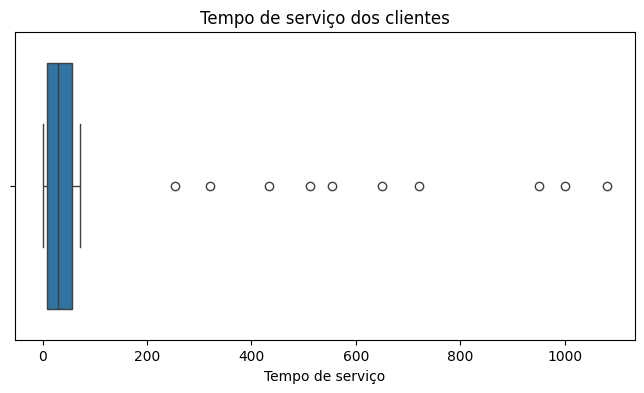

In [103]:
#Plotando boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x='cliente.tempo_servico',data=df_sem_nulo)
plt.title('Tempo de serviço dos clientes')
plt.xlabel('Tempo de serviço')

In [131]:
#Exibindo os outliers e as colunas referentes
df_sem_nulo[outliers_index][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
1945,1080.0,103.90,112212.00
1946,1000.0,45.90,45900.00
1952,950.0,84.10,79895.00
1956,254.0,46.05,80.35
1958,321.0,99.80,4259.30
1963,650.0,73.00,47450.00
1966,721.0,89.55,3856.75
1970,555.0,19.15,124.40
1973,433.0,89.20,346.20
1974,512.0,19.55,19.55


In [107]:
#Calculando os limites inferior e superior
Q1 = df_sem_nulo['cliente.tempo_servico'].quantile(.25)
Q3 = df_sem_nulo['cliente.tempo_servico'].quantile(.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR

In [120]:
#Imprimindo os parâmetros calculados
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Limite Inferior:", limite_inferior)
print("Limite Superior:", limite_superior)

Q1: 9.0
Q3: 56.0
IQR: 47.0
Limite Inferior: -61.5
Limite Superior: 126.5


In [121]:
#Salvando os valores fora dos limites em uma variável
outliers_index = (df_sem_nulo['cliente.tempo_servico'] < limite_inferior) | (df_sem_nulo['cliente.tempo_servico'] > limite_superior)
outliers_index

0       False
1       False
2       False
3       False
4       False
        ...  
7001    False
7002    False
7003    False
7004    False
7005    False
Name: cliente.tempo_servico, Length: 7006, dtype: bool

In [122]:
#Imprimindo as quantidades
outliers_index.value_counts()

cliente.tempo_servico
False    6996
True       10
Name: count, dtype: int64

In [125]:
#Fazendo uma cópia para que a variável anterior não seja alterada
df_sem_out = df_sem_nulo.copy()

In [124]:
#Exibindo os outliers
df_sem_out[outliers_index]['cliente.tempo_servico']

1945    1080.0
1946    1000.0
1952     950.0
1956     254.0
1958     321.0
1963     650.0
1966     721.0
1970     555.0
1973     433.0
1974     512.0
Name: cliente.tempo_servico, dtype: float64

Percebemos que e alguns casos somente a coluna 'cliente.tempo_servico' possue outliers, enquanto as colunas relacionadas a ela possuem valores comuns. Podemos utilizá-los para ajustar esses outliers.

In [135]:
#Substituindo os valores
df_sem_out.loc[outliers_index, 'cliente.tempo_servico'] = np.ceil(
    df_sem_out.loc[outliers_index, 'conta.cobranca.Total'] /
    df_sem_out.loc[outliers_index, 'conta.cobranca.mensal']
)

In [136]:
#Exibindo as modificações realizadas
df_sem_out[outliers_index][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
1945,1080.0,103.90,112212.00
1946,1000.0,45.90,45900.00
1952,951.0,84.10,79895.00
1956,2.0,46.05,80.35
1958,43.0,99.80,4259.30
1963,650.0,73.00,47450.00
1966,44.0,89.55,3856.75
1970,7.0,19.15,124.40
1973,4.0,89.20,346.20
1974,1.0,19.55,19.55


Text(0.5, 0, 'Tempo de serviço')

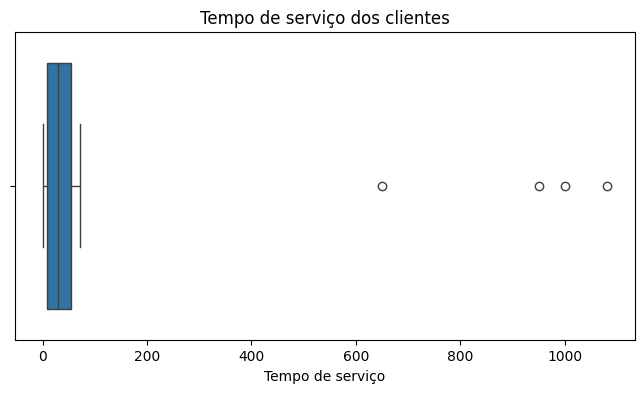

In [137]:
#Plotando boxplot com as modificações feitas
plt.figure(figsize=(8,4))
sns.boxplot(x='cliente.tempo_servico',data=df_sem_out)
plt.title('Tempo de serviço dos clientes')
plt.xlabel('Tempo de serviço')

In [138]:
#Definindo os novos limites
Q1 = df_sem_out['cliente.tempo_servico'].quantile(.25)
Q3 = df_sem_out['cliente.tempo_servico'].quantile(.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR

#Salvando os novos outliers
outliers_index = (df_sem_out['cliente.tempo_servico'] < limite_inferior) | (df_sem_out['cliente.tempo_servico'] > limite_superior)
outliers_index

0       False
1       False
2       False
3       False
4       False
        ...  
7001    False
7002    False
7003    False
7004    False
7005    False
Name: cliente.tempo_servico, Length: 7006, dtype: bool

In [139]:
#Exibindo novos outliers
df_sem_out[outliers_index]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1945,2830-LEWOA,nao,masculino,0,sim,sim,1080.0,sim,nao,fibra otica,...,sim,sim,sim,sim,sim,um ano,nao,cartao de credito (automatico),103.9,112212.0
1946,2831-EBWRN,nao,masculino,0,nao,nao,1000.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,45.9,45900.0
1952,2834-SPCJV,sim,masculino,0,sim,nao,951.0,sim,nao,fibra otica,...,nao,nao,nao,sim,nao,mes a mes,nao,cheque eletronico,84.1,79895.0
1963,2851-STERV,nao,masculino,1,nao,nao,650.0,sim,nao,DSL,...,nao,sim,sim,sim,sim,um ano,sim,cheque eletronico,73.0,47450.0


In [143]:
#Excluindo os novos outliers
df_sem_out = df_sem_out[~outliers_index]

C:\Users\Nathaly\AppData\Local\Temp\ipykernel_17252\2617111056.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sem_out = df_sem_out[~outliers_index]


Text(0.5, 0, 'Tempo de serviço')

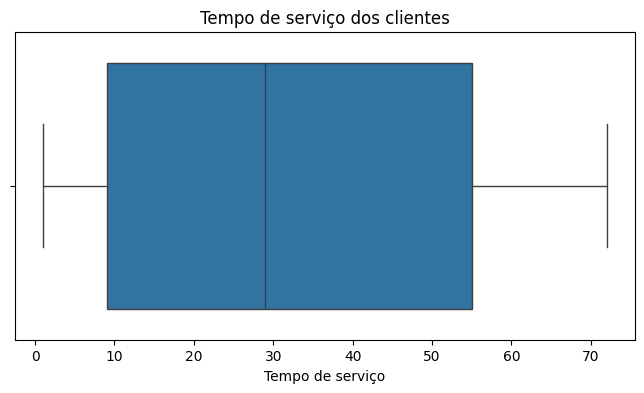

In [145]:
#Plotando boxplot com as modificações feitas
plt.figure(figsize=(8,4))
sns.boxplot(x='cliente.tempo_servico',data=df_sem_out)
plt.title('Tempo de serviço dos clientes')
plt.xlabel('Tempo de serviço')

In [146]:
#Ajustando os índices
df_sem_out.reset_index(drop=True, inplace=True)

In [149]:
#Exibindo tabela final
df_sem_out

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
6998,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
6999,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7000,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


Agora, temos nosso dataset já tratado, estruturado, limpo e sem outliers. Agora podemos utilizar esse dataset para avaliar as relações e padrões entre as informações.

## 3. Análise Exploratória: Perfil dos clientes

Nesta etapa, após termos o dataset já tratado, iniciaremos a análise exploratória dos dados. O objetivo é identificar correlações e padrões entre os dados e nos permitir aprofundar nos detalhes daqueles que apresentarem relações interessantes.

### Obtendo análises e estatísticas descritivas

In [152]:
#Retomando os valores únicos de cada coluna
for col in df_sem_out.columns:
    print(f"Coluna: {col}")
    print(df_sem_out[col].unique())
    print("=" * 60)

Coluna: id_cliente
['0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Coluna: Churn
['nao' 'sim']
Coluna: cliente.genero
['masculino' 'feminino']
Coluna: cliente.idoso
[0 1]
Coluna: cliente.parceiro
['nao' 'sim']
Coluna: cliente.dependentes
['nao' 'sim']
Coluna: cliente.tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
Coluna: telefone.servico_telefone
['sim' 'nao']
Coluna: telefone.varias_linhas
['sim' 'nao' 'sem servico de telefone']
Coluna: internet.servico_internet
['DSL' 'fibra otica' 'nao']
Coluna: internet.seguranca_online
['nao' 'sim' 'sem servico de internet']
Coluna: internet.backup_online
['nao' 'sim' 'sem servico de internet']
Coluna: internet.protecao_dispositivo
['nao' 'sim' 'sem servic

In [150]:
#Obtendo as estatísticas descritivas dos dados 
df_sem_out.describe()

,cliente.idoso,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
count,7002.000000,7002.000000,7002.000000,7002.000000
mean,0.161954,32.394744,64.713503,2278.299986
std,0.368435,24.540354,30.087718,2265.602604
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.450000,401.875000
50%,0.000000,29.000000,70.300000,1391.400000
75%,0.000000,55.000000,89.850000,3778.175000
max,1.000000,72.000000,118.750000,8684.800000


Aqui podemos obter algumas informações importantes sobre as variáveis numéricas, como as médias. Vemos que a média de tempo de serviço de um cliente é de 32 meses ativos.

In [151]:
#Obtendo estatísticas descritivas das variáveis categóricas
df_sem_out.describe(include=[object])

,id_cliente,Churn,cliente.genero,cliente.parceiro,cliente.dependentes,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento
count,7002,7002,7002,7002,7002,7002,7002,7002,7002,7002,7002,7002,7002,7002,7002,7002,7002
unique,7002,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,nao,masculino,nao,nao,sim,nao,fibra otica,nao,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico
freq,1,5147,3528,3623,4909,6324,3369,3075,3472,3074,3080,3451,2796,2768,3855,4143,2352


Dessa forma podemos obter também informações importantes sobre essas colunas, como o tipo de contrato mais utilizado e também o método de pagamento, mês a mês e cheque eletrônico, respectivamente. 

Para padronizar as categorias foi feita uma modificação nos dados da coluna 'cliente_idoso', para que ao invés de dados binários obtivéssemos as categorias 'sim' e 'não', assim como as outras.

In [156]:
#Configurando o mapeamento para substituição
mapeamento = {
    1: 'sim',
    0: 'não'
}

df_sem_out['cliente.idoso'] = df_sem_out['cliente.idoso'].replace(mapeamento)

In [158]:
#Verificando que a coluna cliente_idoso deixou de fazer parte das variáveis numéricas
df_sem_out.describe()

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
count,7002.000000,7002.000000,7002.000000
mean,32.394744,64.713503,2278.299986
std,24.540354,30.087718,2265.602604
min,1.000000,18.250000,18.800000
25%,9.000000,35.450000,401.875000
50%,29.000000,70.300000,1391.400000
75%,55.000000,89.850000,3778.175000
max,72.000000,118.750000,8684.800000


In [159]:
#Verificando a inclusão da coluna
df_sem_out.describe(include=[object])

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento
count,7002,7002,7002,7002,7002,7002,7002,7002,7002,7002,7002,7002,7002,7002,7002,7002,7002,7002
unique,7002,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,nao,masculino,não,nao,nao,sim,nao,fibra otica,nao,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico
freq,1,5147,3528,5868,3623,4909,6324,3369,3075,3472,3074,3080,3451,2796,2768,3855,4143,2352


Nas próximas análises não será necessária a coluna 'id_cliente', então iremos separá-la por enquanto e utilizar uma nova variável.

In [181]:
#Realizando a cópia para não sobreescrever com as novas alterações
df_sem_id = df_sem_out.copy()

In [183]:
#Retirand a coluna 'id_cliente'
df_sem_id.drop('id_cliente', axis = 1, inplace = True)

KeyError: "['id_cliente'] not found in axis"

In [184]:
#Exibindo as modificações
df_sem_id.head()

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,nao,masculino,não,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40
1,sim,masculino,não,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
2,sim,masculino,sim,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
3,sim,feminino,sim,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40
4,nao,feminino,não,nao,sim,9.0,sim,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45


### Variáveis numéricas

#### Analisando distribuições

Agora que conhecemos um pouco mais nossos dados, iremos iniciar a plotar visualizações gráficas para facilitar o entendimento e interpretação. Começando com a análise das distribuições das variáveis numéricas.

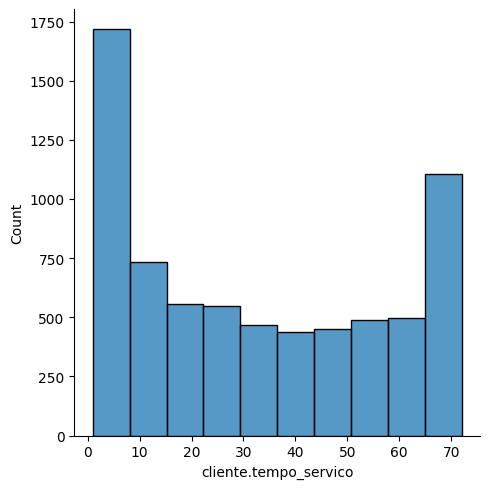

In [185]:
#Plotando gráfico da quantidade de clientes por tempo de serviço
sns.displot(df_sem_id, x='cliente.tempo_servico', bins=10)
plt.show()

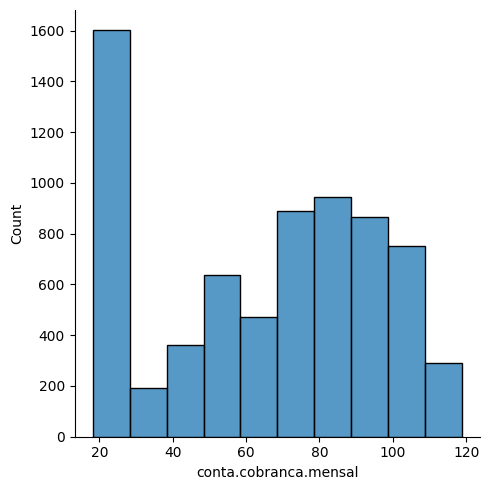

In [186]:
#Plotando gráfico da quantidade de clientes por cobrança
sns.displot(df_sem_id, x='conta.cobranca.mensal', bins=10)
plt.show()

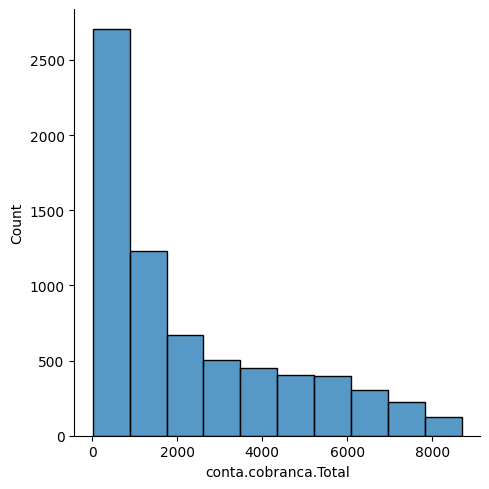

In [187]:
#Plotando gráfico da quantidade de clientes por cobrança total
sns.displot(df_sem_id, x='conta.cobranca.Total', bins=10)
plt.show()

Vemos pelos histogramas que as variáveis não seguem uma distribuição normal. No primeiro gráfico, podemos perceber que temos uma maior quantidade de clietes entre 0 e 10 meses de serviço e depois por volta de 70 meses. Os outros gráficos mostram um comportamento parecido entre si, mostrando que maior parte dos clientes paga entre R$ 20,00 e R$ 30,00 reais por mês, refletindo na cobrança total que tem seu pico abaixo de R$2.000,00.

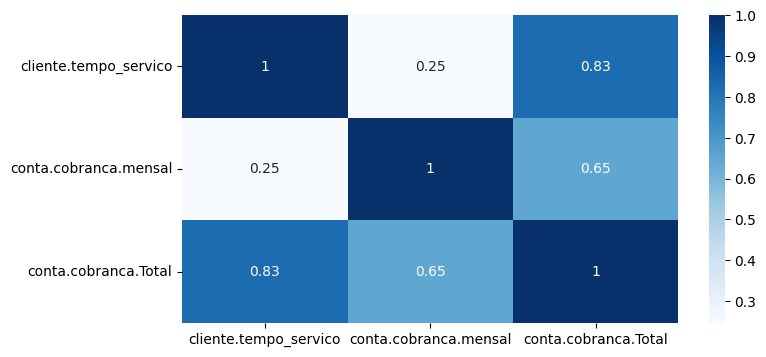

In [188]:
#Definindo as configurações do mapa de calor 
plt.figure(figsize=(8,4))

#Definindo parâmetros como valores numéricos, anotações e cores e exibindo
sns.heatmap(df_sem_id.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

O mapa de calor confirma a correlação elevada entre tempo de serviço do cliente e as cobranças mensais e totais.

### Variáveis categóricas

Para avaliar as variáveis categóricas, inicialmente vamos classificar o tempo de serviço do cliente por períodos de tempo, para entender quais são os períodos com maior quantidade de clientes.

In [265]:
#Criando função que separe em períodos
def set_tenure_category(v):
    if (v <=12):
        return 'Até 12'
    elif (v > 12) & (v <= 24):
        return '12 - 24'
    elif (v > 24) & (v <= 48):
        return '24 - 48'
    elif (v > 48) & (v <= 60):
        return '48 - 60'
    elif (v > 60) & (v <= 72):
        return '60 - 72'
    elif (v> 72):
        return 'Mais de 72'

In [203]:
#Criando coluna para inserir os novos valores
df_sem_id['Período de cliente ativo (meses)'] = df_sem_id['cliente.tempo_servico'].apply(set_tenure_category)

In [267]:
df_sem_id.drop('Período de cliente ativo', axis=1)

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,...,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total,Período de cliente ativo (meses)
0,nao,masculino,não,nao,nao,9.0,sim,sim,DSL,nao,...,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40,Até 12
1,sim,masculino,não,nao,nao,4.0,sim,nao,fibra otica,nao,...,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85,Até 12
2,sim,masculino,sim,sim,nao,13.0,sim,nao,fibra otica,nao,...,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85,12 - 24
3,sim,feminino,sim,sim,nao,3.0,sim,nao,fibra otica,nao,...,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40,Até 12
4,nao,feminino,não,nao,sim,9.0,sim,nao,DSL,nao,...,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45,Até 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,nao,feminino,não,nao,nao,13.0,sim,nao,DSL,sim,...,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90,12 - 24
6998,sim,masculino,não,sim,nao,22.0,sim,sim,fibra otica,nao,...,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70,12 - 24
6999,nao,masculino,não,nao,nao,2.0,sim,nao,DSL,nao,...,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75,Até 12
7000,nao,masculino,não,sim,sim,67.0,sim,nao,DSL,sim,...,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65,60 - 72


In [270]:
df_sem_id.head()

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,...,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total,Período de cliente ativo,Período de cliente ativo (meses)
0,nao,masculino,não,nao,nao,9.0,sim,sim,DSL,nao,...,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40,Até 12 meses,Até 12
1,sim,masculino,não,nao,nao,4.0,sim,nao,fibra otica,nao,...,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85,Até 12 meses,Até 12
2,sim,masculino,sim,sim,nao,13.0,sim,nao,fibra otica,nao,...,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85,Entre 12 e 24 meses,12 - 24
3,sim,feminino,sim,sim,nao,3.0,sim,nao,fibra otica,nao,...,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40,Até 12 meses,Até 12
4,nao,feminino,não,nao,sim,9.0,sim,nao,DSL,nao,...,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45,Até 12 meses,Até 12


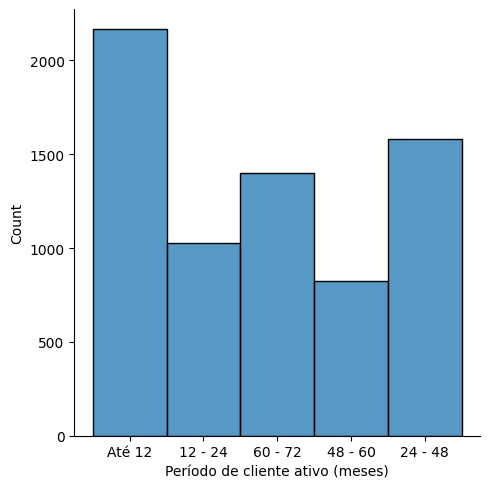

In [266]:
#Plotando gráfico com as classificações
sns.displot(df_sem_id, x='Período de cliente ativo (meses)')
plt.show()

Obervando o gráfico é possível perceber que grande parte dos clientes se encontra ativo até 12 meses, mas também há um outro pico entre 24 e 48 meses.

Vamos analisar também outras variáveis e entender o perfil dos clientes mas, primeiro, vamos verificar qual a quantidade de clientes ativos na base.

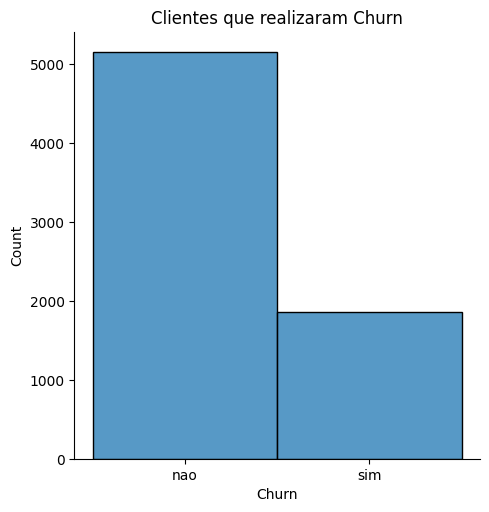

In [238]:
#Plotando gráfico da quantidade de clientes que realizaram Churn
sns.displot(x='Churn', data=df_sem_id)
plt.title('Clientes que realizaram Churn')

plt.show()

Podemos ver que a maior parte dos clientes da base continuam ativos, mas podeoms entrar com mais detalhes nesses números.

In [277]:
#Exibindo a contagem para cada 
df_sem_id['Churn'].value_counts()

Churn
nao    5147
sim    1855
Name: count, dtype: int64

In [281]:
#Exibindo total de clientes na base
len(df_sem_id['Churn'])

7002

In [278]:
#Exibindo a contagem para cada em porcentagem
df_sem_id['Churn'].value_counts(normalize=True)

Churn
nao    0.735076
sim    0.264924
Name: proportion, dtype: float64

Assim, percebemos que mais de 70% da base ainda está ativa.

Podemos continuar plotando alguns gráficos para entender o perfil dos clientes.

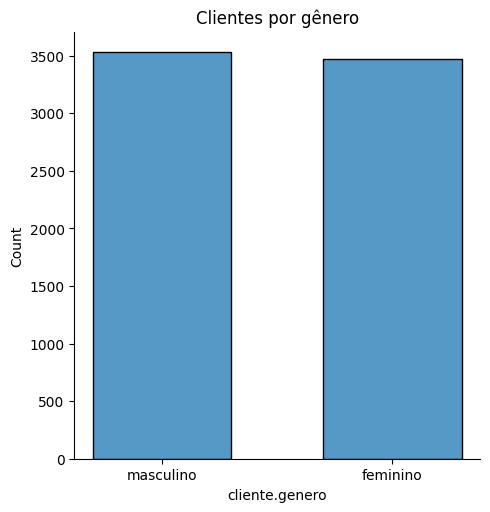

In [295]:
sns.displot(x='cliente.genero', data=df_sem_id, shrink=0.6)
plt.title('Clientes por gênero')

plt.show()

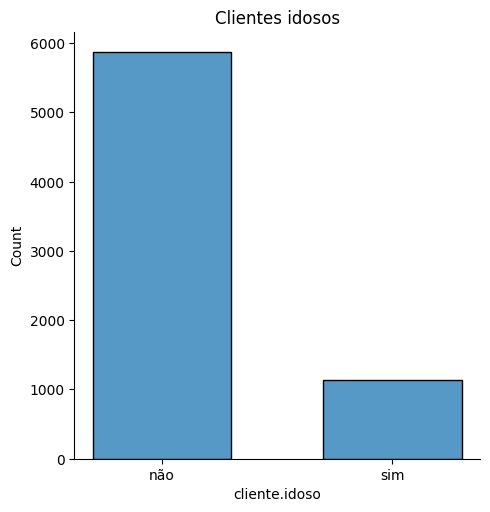

In [294]:
sns.displot(x='cliente.idoso', data=df_sem_id, shrink=0.6)
plt.title('Clientes idosos')

plt.show()

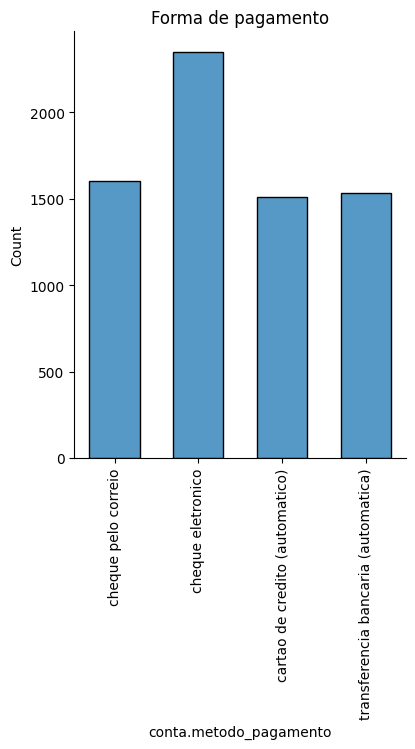

In [293]:
sns.displot(x='conta.metodo_pagamento', data=df_sem_id, discrete=True, shrink=0.6)
plt.title('Forma de pagamento')

plt.xticks(rotation=90)

plt.show()

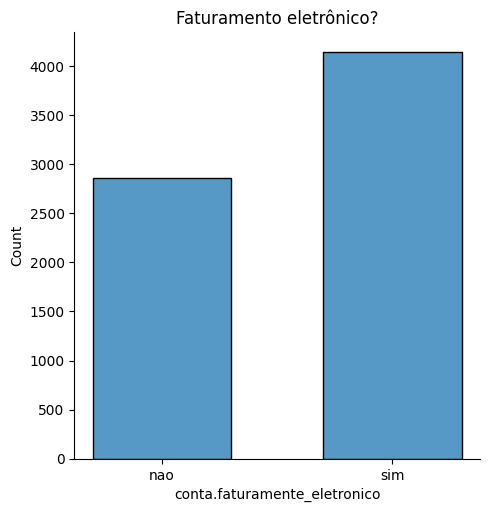

In [297]:
sns.displot(x='conta.faturamente_eletronico', data=df_sem_id, shrink=0.6)
plt.title('Faturamento eletrônico?')

plt.show()

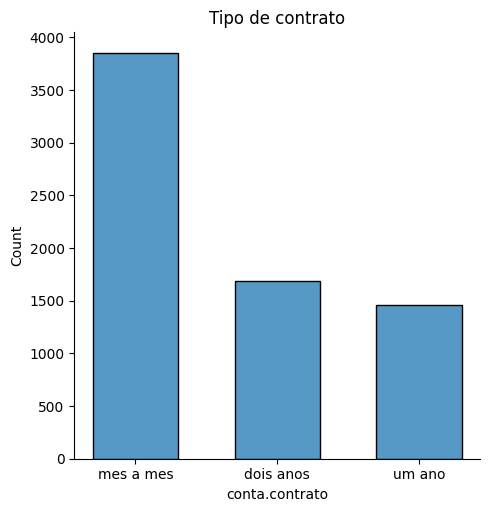

In [296]:
sns.displot(x='conta.contrato', data=df_sem_id, shrink=0.6)
plt.title('Tipo de contrato')

plt.show()

Através destes gráficos podemos perceber que a maior parte dos clientes se encontra no tipo de contrato mês a mês, e também grande parte optou pelo pagamento através de cheque eletrônico. Essa informação é semelhante a que temos no gráfico que o sucede, a maior parte dos clientes opta por pagamento de forma eletrônica. 

Agora que analisamos algumas informações e relações com os clientes, podemos iniciar a análise de churn.

## 4.Análise de Churn

In [261]:
relacao_churn_genero = df_sem_id.groupby('cliente.genero')['Churn'].value_counts().unstack()
relacao_churn_idoso = df_sem_id.groupby('cliente.idoso')['Churn'].value_counts(normalize=True).unstack()
relacao_churn_dependente = df_sem_id.groupby('cliente.parceiro')['Churn'].value_counts(normalize=True).unstack()
relacao_churn_parceiro = df_sem_id.groupby('cliente.dependentes')['Churn'].value_counts(normalize=True).unstack()

relacao_churn_telefone = df_sem_id.groupby('telefone.servico_telefone')['Churn'].value_counts(normalize=True).unstack()
relacao_churn_linhas = df_sem_id.groupby('telefone.varias_linhas')['Churn'].value_counts(normalize=True).unstack()
relacao_churn_internet = df_sem_id.groupby('telefone.varias_linhas')['Churn'].value_counts(normalize=True).unstack()
relacao_churn_segonline = df_sem_id.groupby('telefone.varias_linhas')['Churn'].value_counts(normalize=True).unstack()
relacao_churn_backup = df_sem_id.groupby('internet.backup_online')['Churn'].value_counts(normalize=True).unstack()
relacao_churn_protecao_disp = df_sem_id.groupby('internet.protecao_dispositivo')['Churn'].value_counts(normalize=True).unstack()
relacao_churn_suporte = df_sem_id.groupby('internet.suporte_tecnico')['Churn'].value_counts(normalize=True).unstack()
relacao_churn_protecao_disp = df_sem_id.groupby('internet.protecao_dispositivo')['Churn'].value_counts(normalize=True).unstack()
relacao_churn_tvstreaming = df_sem_id.groupby('internet.tv_streaming')['Churn'].value_counts(normalize=True).unstack()
relacao_churn_filmesstreaming = df_sem_id.groupby('internet.filmes_streaming')['Churn'].value_counts(normalize=True).unstack()

relacao_churn_contrato = df_sem_id.groupby('conta.contrato')['Churn'].value_counts(normalize=True).unstack()
relacao_churn_fat_eletronico = df_sem_id.groupby('conta.faturamente_eletronico')['Churn'].value_counts(normalize=True).unstack()
relacao_churn_pagamento = df_sem_id.groupby('conta.metodo_pagamento')['Churn'].value_counts(normalize=True).unstack()

print('Cliente:')
print('-----------------------------')
print(relacao_churn_genero)
print(relacao_churn_idoso)
print(relacao_churn_dependente)
print(relacao_churn_parceiro)
print('\n')
print('Serviços:')
print('-----------------------------')
print(relacao_churn_telefone)
print(relacao_churn_linhas)
print(relacao_churn_internet)
print(relacao_churn_segonline)
print(relacao_churn_backup)
print(relacao_churn_protecao_disp)
print(relacao_churn_suporte)
print(relacao_churn_tvstreaming)
print(relacao_churn_filmesstreaming)
print('\n')
print('Conta:')
print('-----------------------------')
print(relacao_churn_contrato)
print(relacao_churn_fat_eletronico)
print(relacao_churn_pagamento)

Cliente:
-----------------------------
Churn            nao  sim
cliente.genero           
feminino        2543  931
masculino       2604  924
Churn               nao       sim
cliente.idoso                    
não            0.764145  0.235855
sim            0.584656  0.415344
Churn                  nao       sim
cliente.parceiro                    
nao               0.670715  0.329285
sim               0.804084  0.195916
Churn                     nao       sim
cliente.dependentes                    
nao                  0.688124  0.311876
sim                  0.845198  0.154802


Serviços:
-----------------------------
Churn                           nao       sim
telefone.servico_telefone                    
nao                        0.752212  0.247788
sim                        0.733238  0.266762
Churn                         nao       sim
telefone.varias_linhas                     
nao                      0.749481  0.250519
sem servico de telefone  0.752212  0.247788
sim        

In [262]:
relacao_churn_genero = df_sem_id.groupby('cliente.genero')['Churn'].value_counts().unstack()
relacao_churn_idoso = df_sem_id.groupby('cliente.idoso')['Churn'].value_counts().unstack()
relacao_churn_dependente = df_sem_id.groupby('cliente.parceiro')['Churn'].value_counts().unstack()
relacao_churn_parceiro = df_sem_id.groupby('cliente.dependentes')['Churn'].value_counts(normalize=True).unstack()

relacao_churn_telefone = df_sem_id.groupby('telefone.servico_telefone')['Churn'].value_counts().unstack()
relacao_churn_linhas = df_sem_id.groupby('telefone.varias_linhas')['Churn'].value_counts().unstack()
relacao_churn_internet = df_sem_id.groupby('telefone.varias_linhas')['Churn'].value_counts().unstack()
relacao_churn_segonline = df_sem_id.groupby('telefone.varias_linhas')['Churn'].value_counts().unstack()
relacao_churn_backup = df_sem_id.groupby('internet.backup_online')['Churn'].value_counts().unstack()
relacao_churn_protecao_disp = df_sem_id.groupby('internet.protecao_dispositivo')['Churn'].value_counts().unstack()
relacao_churn_suporte = df_sem_id.groupby('internet.suporte_tecnico')['Churn'].value_counts().unstack()
relacao_churn_protecao_disp = df_sem_id.groupby('internet.protecao_dispositivo')['Churn'].value_counts().unstack()
relacao_churn_tvstreaming = df_sem_id.groupby('internet.tv_streaming')['Churn'].value_counts().unstack()
relacao_churn_filmesstreaming = df_sem_id.groupby('internet.filmes_streaming')['Churn'].value_counts().unstack()

relacao_churn_contrato = df_sem_id.groupby('conta.contrato')['Churn'].value_counts().unstack()
relacao_churn_fat_eletronico = df_sem_id.groupby('conta.faturamente_eletronico')['Churn'].value_counts().unstack()
relacao_churn_pagamento = df_sem_id.groupby('conta.metodo_pagamento')['Churn'].value_counts().unstack()

print('Cliente:')
print('-----------------------------')
print(relacao_churn_genero)
print(relacao_churn_idoso)
print(relacao_churn_dependente)
print(relacao_churn_parceiro)
print('\n')
print('Serviços:')
print('-----------------------------')
print(relacao_churn_telefone)
print(relacao_churn_linhas)
print(relacao_churn_internet)
print(relacao_churn_segonline)
print(relacao_churn_backup)
print(relacao_churn_protecao_disp)
print(relacao_churn_suporte)
print(relacao_churn_tvstreaming)
print(relacao_churn_filmesstreaming)
print('\n')
print('Conta:')
print('-----------------------------')
print(relacao_churn_contrato)
print(relacao_churn_fat_eletronico)
print(relacao_churn_pagamento)

Cliente:
-----------------------------
Churn            nao  sim
cliente.genero           
feminino        2543  931
masculino       2604  924
Churn           nao   sim
cliente.idoso            
não            4484  1384
sim             663   471
Churn              nao   sim
cliente.parceiro            
nao               2430  1193
sim               2717   662
Churn                     nao       sim
cliente.dependentes                    
nao                  0.688124  0.311876
sim                  0.845198  0.154802


Serviços:
-----------------------------
Churn                       nao   sim
telefone.servico_telefone            
nao                         510   168
sim                        4637  1687
Churn                     nao  sim
telefone.varias_linhas            
nao                      2525  844
sem servico de telefone   510  168
sim                      2112  843
Churn                     nao  sim
telefone.varias_linhas            
nao                      2525  844
sem

In [263]:
relacao_churn_contrato

Churn,nao,sim
conta.contrato,,
dois anos,1639,47
mes a mes,2210,1645
um ano,1298,163
